In [466]:
import numpy as np

In [467]:
import pandas as pd

In [468]:
import matplotlib.pyplot as plt
%matplotlib inline

In [469]:
from sklearn.datasets import load_breast_cancer

In [470]:
from sklearn.ensemble import RandomForestClassifier

In [471]:
from sklearn.linear_model import SGDClassifier

In [472]:
from sklearn.preprocessing import StandardScaler

In [473]:
from sklearn.model_selection import train_test_split

In [474]:
from sklearn.model_selection import cross_val_score

In [475]:
from sklearn.model_selection import cross_val_predict

In [476]:
from sklearn.metrics import confusion_matrix

In [477]:
from sklearn.metrics import precision_score, recall_score

In [478]:
from sklearn.model_selection import GridSearchCV

In [479]:
breast_cancer = load_breast_cancer()

In [480]:
breast_cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [481]:
breast_cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [482]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [483]:
breast_cancer_data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names) 

In [484]:
breast_cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [485]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [486]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [487]:
breast_cancer_data['status'] = breast_cancer.target

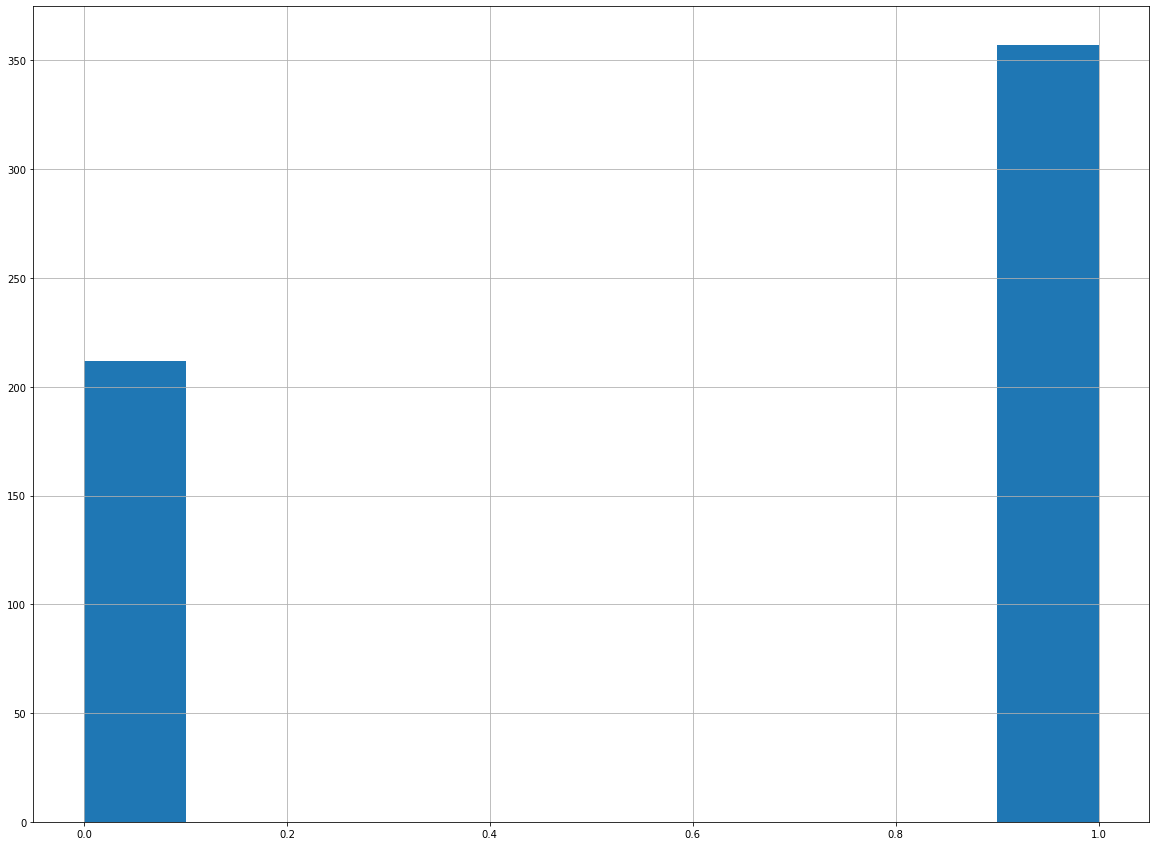

In [488]:
breast_cancer_data['status'].hist(figsize=(20,15))

In [489]:
breast_cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,status
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [490]:
breast_cancer_data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,status
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [491]:
X_train, X_test = train_test_split(breast_cancer_data, test_size=0.2, random_state=5)

In [492]:
x_train = X_train.drop('status', axis=1)

In [493]:
y_train = X_train['status'].copy()

In [494]:
X_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=3)

# SGDCLASSIFIER

In [495]:
sgd_clf = SGDClassifier()

In [496]:
scaler = StandardScaler()

In [497]:
x_train = scaler.fit_transform(X_train.astype(np.float64))

In [498]:
sgd_clf.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [499]:
sgd_score = ((sgd_clf.score(x_train, y_train))*100)
print(f'SGDClassifier Training Accuracy: {sgd_score}')

SGDClassifier Training Accuracy: 98.62637362637363


In [500]:
import joblib

joblib.dump(sgd_clf, 'sgd_clf.pkl')#saaving the model

['sgd_clf.pkl']

#    RAMDOMFORESTCLASSIFIER

In [501]:
forest_clf = RandomForestClassifier(random_state=0)

In [502]:
forest_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [503]:
forest_score = ((forest_clf.score(x_train, y_train))*100)
print(f'RANDOMFORESTClassifier Training Accuracy: {forest_score}')

RANDOMFORESTClassifier Training Accuracy: 100.0


In [504]:
#saving the model
import joblib

joblib.dump(forest_clf, 'forest_clf.pkl')

['forest_clf.pkl']

# SUPPORT VECTOR CLASSIFIERS

In [505]:
from sklearn.svm import SVC, LinearSVC

In [506]:
lin_svc = LinearSVC(loss='hinge', C=10)
lin_svc.fit(x_train, y_train)

c:\users\david\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [507]:
lin_svc_score = ((lin_svc.score(x_train, y_train))*100)
print(f'LINEARSVC Training Accuracy: {lin_svc_score}')

LINEARSVC Training Accuracy: 99.45054945054946


In [508]:
#saving the model
import joblib

joblib.dump(lin_svc, 'lin_svc.pkl')

['lin_svc.pkl']

In [509]:
#using the rbf kernel trick
rbf_kernel_svc = SVC(kernel='rbf', gamma=0.01, C=10)
rbf_kernel_svc.fit(x_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [510]:
rbf_kernel_svc_score = ((rbf_kernel_svc.score(x_train, y_train))*100)
print(f'SVC Training Accuracy: {rbf_kernel_svc_score}')

SVC Training Accuracy: 98.9010989010989


In [511]:
#saving the model
import joblib

joblib.dump(rbf_kernel_svc, 'rbf_kernel_svc.pkl')

['rbf_kernel_svc.pkl']

In [512]:
testing_accuracy = pd.DataFrame({'Model': ['SGDClassifier', 'RandomForestClassifier', 'LinearSVC', 'SVC(kernel="rbf")'],
                   'Training Accuracy': [sgd_score, forest_score, lin_svc_score, rbf_kernel_svc_score]})
testing_acc_df = testing_accuracy.sort_values(by='Training Accuracy', ascending=False)
testing_acc_df.head()

,Model,Training Accuracy
1,RandomForestClassifier,100.000000
2,LinearSVC,99.450549
3,"SVC(kernel=""rbf"")",98.901099
0,SGDClassifier,98.626374


Oh wow! SGDClassifier with default hyperparameters and SVC(kernel='rbf') with hyperparameter gamma= 0.01, C=10

Now lets try all the models on new instances with is our validation set to see the see which one performs best

# FITTING MODELS TO NEW INSTANCES(VALIDATION SET)

In [513]:
X_val= scaler.fit_transform(x_val)

In [514]:
sgd_clf_pred = sgd_clf.predict(X_val)
forest_clf_pred = forest_clf.predict(X_val)
lin_svc_pred = lin_svc.predict(X_val)
rbf_kernel_svc_pred = rbf_kernel_svc.predict(X_val)

In [515]:
sgd_scores = cross_val_score(sgd_clf, X_val, y_val, cv=5, scoring='accuracy').mean()
forest_scores = cross_val_score(forest_clf, X_val, y_val, cv=5, scoring='accuracy').mean()
lin_svc_scores = cross_val_score(lin_svc, X_val, y_val, cv=5, scoring='accuracy').mean()
rbf_kernel_svc_scores = cross_val_score(rbf_kernel_svc, X_val, y_val, cv=5, scoring='accuracy').mean()

#output
print(f'SGDCLASSIFIER TESTING ACCURACY: {(sgd_scores*100):.2f}%')
print(f'RANDOMFORESTCLASSIFIER TESTING ACCURACY: {(forest_scores*100):.2f}%')
print(f'LINEARSVC TESTING ACCURACY: {(lin_svc_scores*100):.2f}%')
print(f'SVC(kernel="rbf") TESTING ACCURACY: {(rbf_kernel_svc_scores*100):.2f}%')





#print('Scores:', val_scores)
#print('Mean:', val_scores.mean())
#print('Standard Deviation:', val_scores.std())

SGDCLASSIFIER TESTING ACCURACY: 97.78%
RANDOMFORESTCLASSIFIER TESTING ACCURACY: 95.61%
LINEARSVC TESTING ACCURACY: 94.44%
SVC(kernel="rbf") TESTING ACCURACY: 95.56%


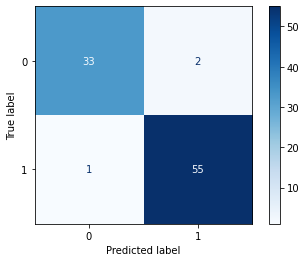

In [523]:
#plotting confusion matrix for SGDClassifier
from sklearn.metrics import plot_confusion_matrix

conf_mat = plot_confusion_matrix(sgd_clf, X_val, y_val, cmap='Blues', values_format='d')

In [518]:
#normal confusion matrix
conf_mat.confusion_matrix

array([[33,  2],
       [ 1, 55]], dtype=int64)

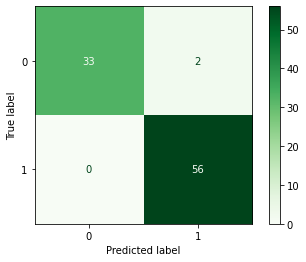

In [519]:
#plotting confusion matrix for RandomForest
conf_ma = plot_confusion_matrix(forest_clf, X_val, y_val, cmap='Greens', values_format='d')

In [520]:
#normal confusion matrix
conf_ma.confusion_matrix

array([[33,  2],
       [ 0, 56]], dtype=int64)

In [ ]:
#i'm actually confused right now on which model to choose. i think i'm just going to choose the RandomForest

In [525]:
#sgd precision and recall score
print('Precision Score:', precision_score(y_val, sgd_clf_pred))
print('Recall Score:', recall_score(y_val, sgd_clf_pred))

Precision Score: 0.9649122807017544
Recall Score: 0.9821428571428571


In [526]:
#forest precision and recall score
print('Precision Score:', precision_score(y_val, forest_clf_pred))
print('Recall Score:', recall_score(y_val, forest_clf_pred))

Precision Score: 0.9655172413793104
Recall Score: 1.0


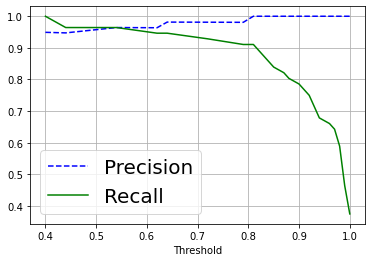

In [527]:
#precision_recall_curve
from sklearn.metrics import precision_recall_curve

y_forest_proba = cross_val_predict(forest_clf, X_val, y_val, cv=5,
                                           method='predict_proba')
y_scores = y_forest_proba[:, 1]# gets the positive probabilities

precisions, recalls, thresholds = precision_recall_curve(y_val, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.xlabel('Threshold')
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.legend(fontsize=20)
    plt.grid()

    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

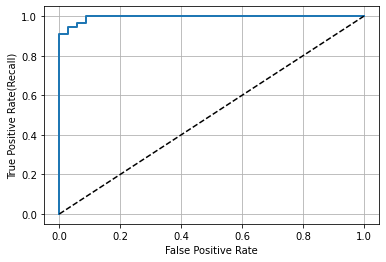

In [528]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate(Recall)')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')# dashed diagonal
    plt.grid()
plot_roc_curve(fpr, tpr)

In [529]:
from sklearn.metrics import roc_auc_score

ras = roc_auc_score(y_val, y_scores)
print('ROC_AUC_SCORE:', ras)

ROC_AUC_SCORE: 0.9948979591836734


# YEAH! IT'S TIME TO FIT THE MODEL TO THE TEST SET

In [532]:
x_test = X_test.drop('status', axis=1)
y_test = X_test['status']

In [533]:
X_test = scaler.transform(x_test)

In [530]:
final_model = joblib.load('forest_clf.pkl')

In [534]:
y_test_pred = final_model.predict(X_test)

In [536]:
final_predicted = pd.DataFrame(y_test_pred, columns=['status'])
final_predicted.head()

,status
0,0
1,1
2,1
3,1
4,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B70BD083C8>]],
      dtype=object)

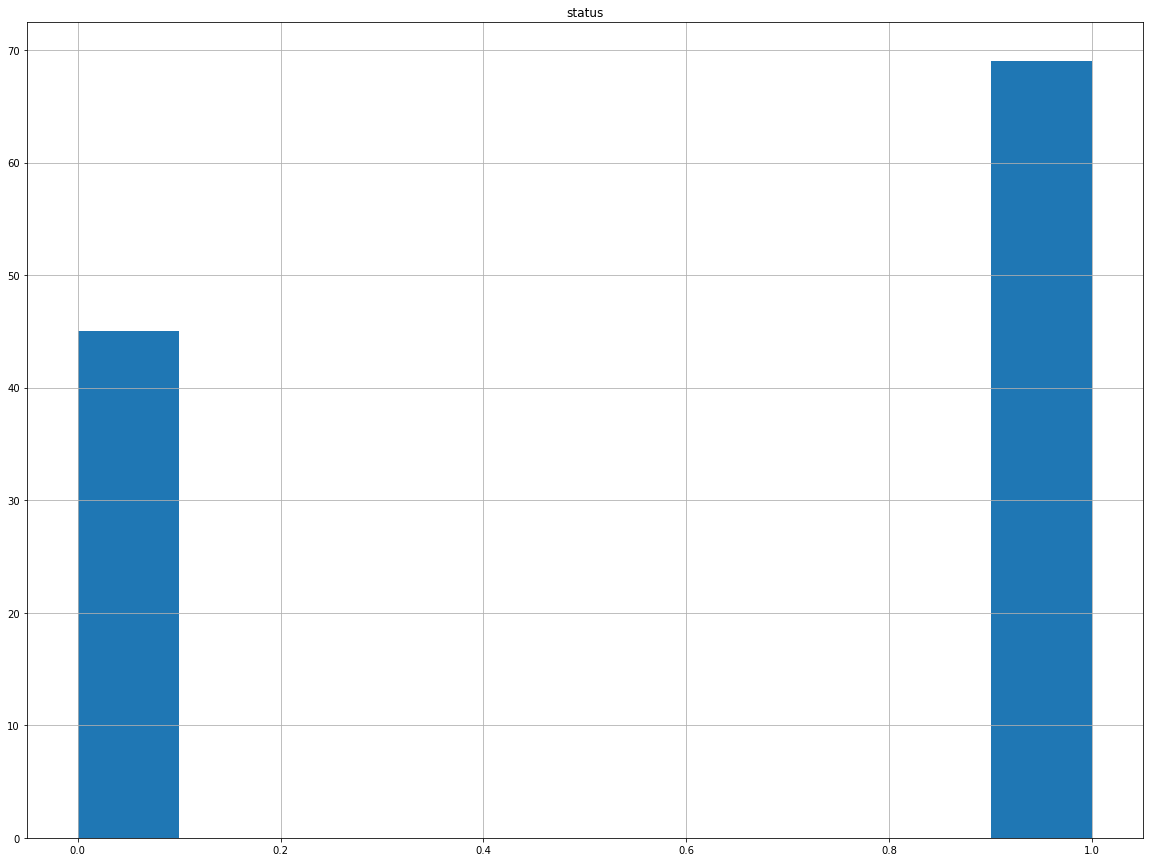

In [537]:
final_predicted.hist(figsize=(20, 15))
#visualising the predicte values

In [538]:
final_predicted.to_csv('breast_cancer_predicted.csv', index=False)